In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

#### Basics

###### La méthode iplot donne une meilleur visualisation du graphisme

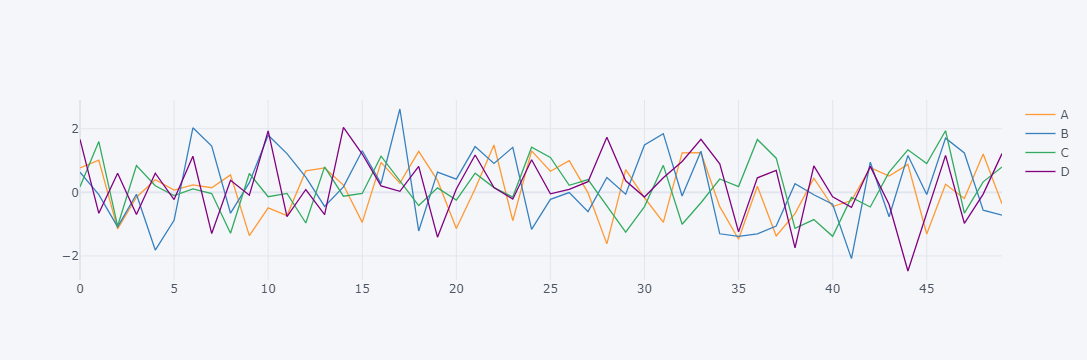

In [5]:
arr_1 = np.random.randn(50, 4)
df_1 = pd.DataFrame(arr_1, columns=['A', 'B', 'C', 'D'])
df_1.head()
#df_1.plot()
df_1.iplot()

## Line Plots

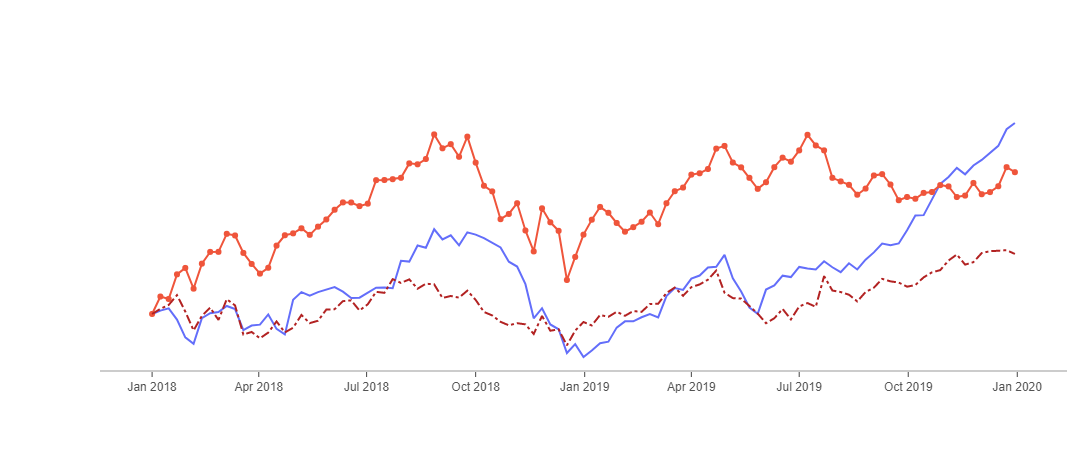

In [6]:
import plotly.graph_objects as go
df_stocks = px.data.stocks()
px.line(df_stocks, x='date', y='GOOG', labels={'x': 'Date', 'y':'Price'})

px.line(df_stocks, x='date', y=['GOOG', 'AAPL'],
       labels={'x':'Date', 'y':'Price'}, title='AAPL vs Google')

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL,
                        mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN,
                        mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG,
                        mode='lines', name='Google',
                        line=dict(color='firebrick', width=2,
                                 dash='dashdot')))
#fig.update_layout(title='Stock Price Data 2018- 2020',
#                 xaxis_title = 'Price', yaxis_title='Date')
fig.update_layout(
xaxis=dict(
showline=True, showgrid=False, showticklabels=True,
linecolor='rgb(204, 204, 204)',
linewidth=2, ticks='outside', tickfont=dict(
family='Arial', size=12, color='rgb(82, 82, 82)',
),
),
yaxis=dict(showgrid=False, zeroline=False, showline=False,
          showticklabels=False),
autosize=False,
margin=dict(
autoexpand=False, l=100, r=20, t=110, ),
showlegend=False, plot_bgcolor='white')

### Bars Charts

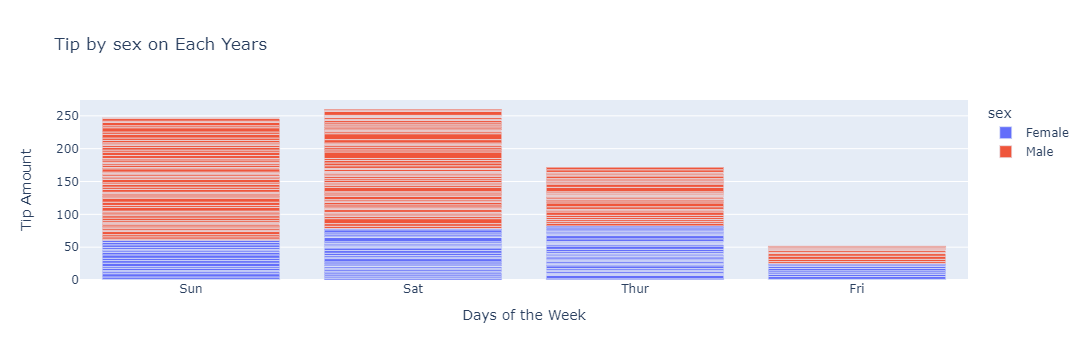

In [7]:
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us, x='year', y='pop')

df_tips = px.data.tips()
px.bar(df_tips, x='day', y='tip', color='sex', 
      title='Tip by sex on Each Years',
      labels={'tip':'Tip Amount', 'day':'Days of the Week'})

### Scatter Plots

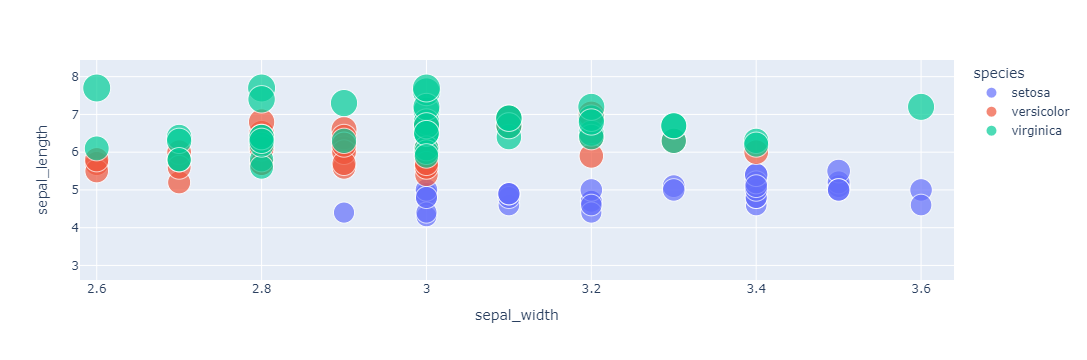

In [8]:
df_iris = px.data.iris()
px.scatter(df_iris, x='sepal_width', y='sepal_length',
          color='species', size='sepal_length',
          hover_data=['sepal_width'])

### Box Plots

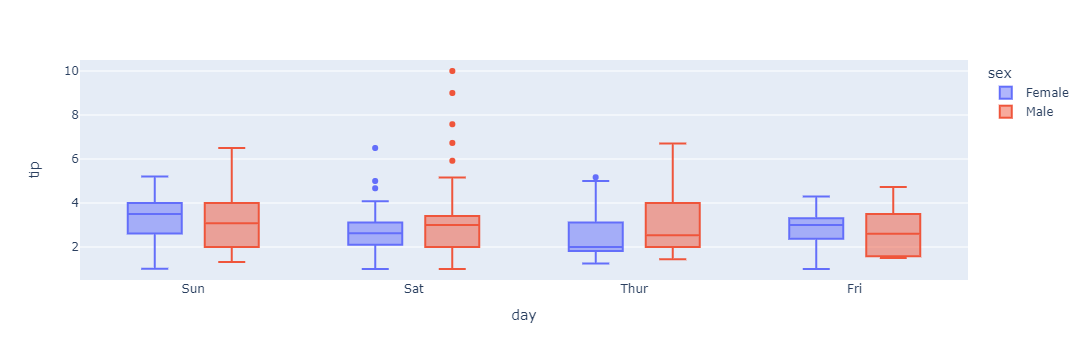

In [11]:
df_tips = px.data.tips()
px.box(df_tips, x='sex', y='tip', points='all')
px.box(df_tips, x='day', y='tip', color='sex')

### Violin Plots

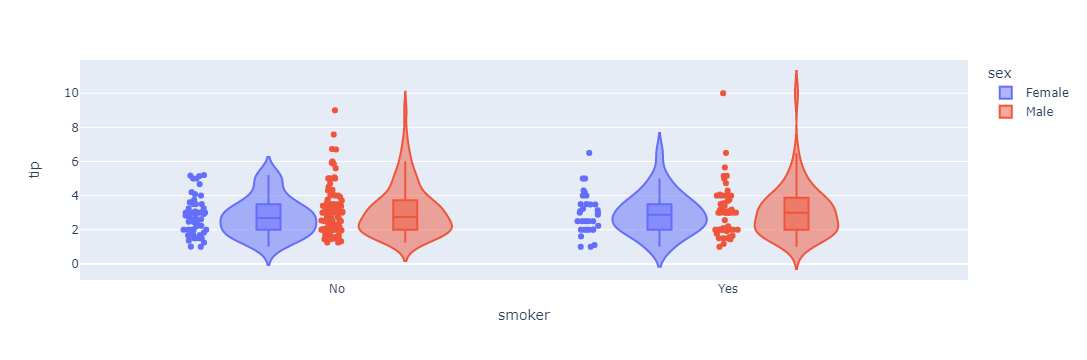

In [4]:
df_tips = px.data.tips()
px.violin(df_tips, y='total_bill', box=True, points='all')

px.violin(df_tips, y="tip", x="smoker", color="sex", box=True,
         points="all", hover_data=df_tips.columns)

### Density Heatmps

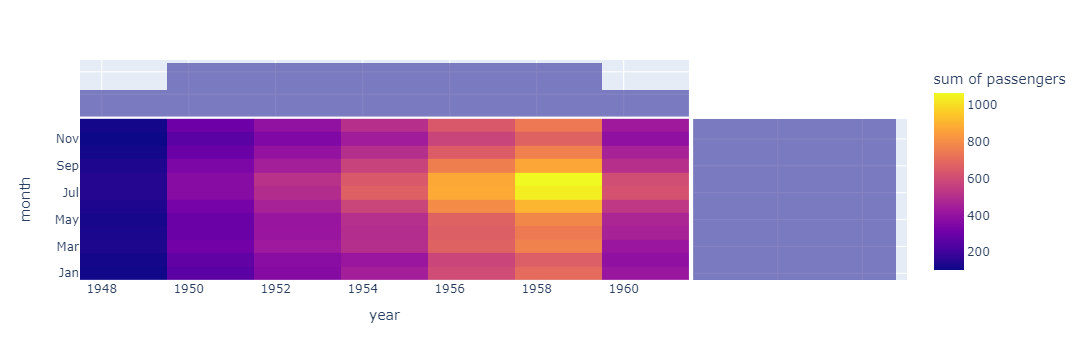

In [11]:
flights = sns.load_dataset("flights")

fig = px.density_heatmap(flights, x='year', y='month',
                         z='passengers',
                         #color_continuous_scale='Viridis',
                        marginal_x='histogram',
                        marginal_y='histogram')

fig

### 3D Scatter Plots

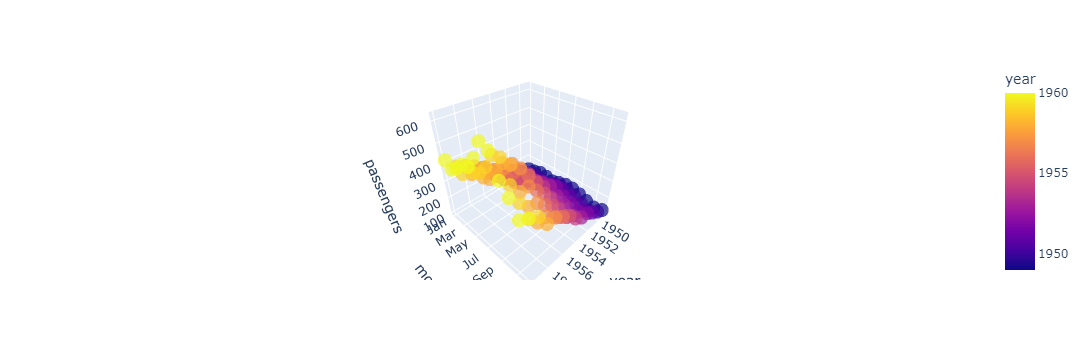

In [13]:
fig = px.scatter_3d(flights, x='year', y='month', z='passengers',
                   color='year', opacity=0.7)

fig

### 3D Line Plots

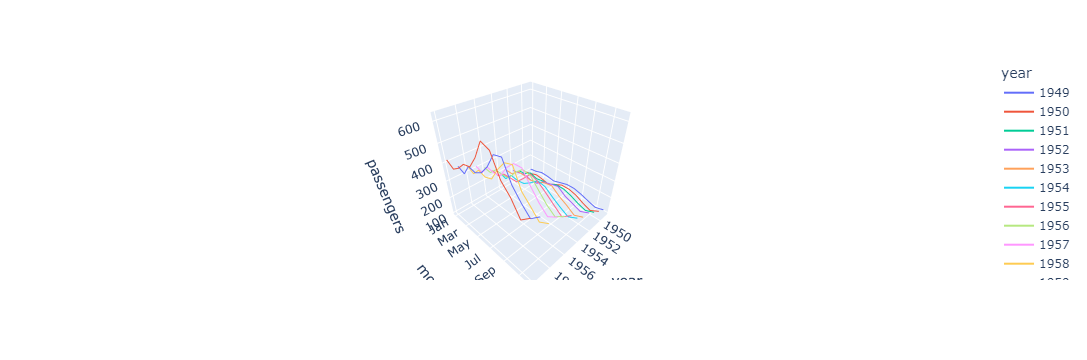

In [15]:
fig = px.line_3d(flights, x='year', y='month', z='passengers',
                   color='year')

fig

### Scatter matrix

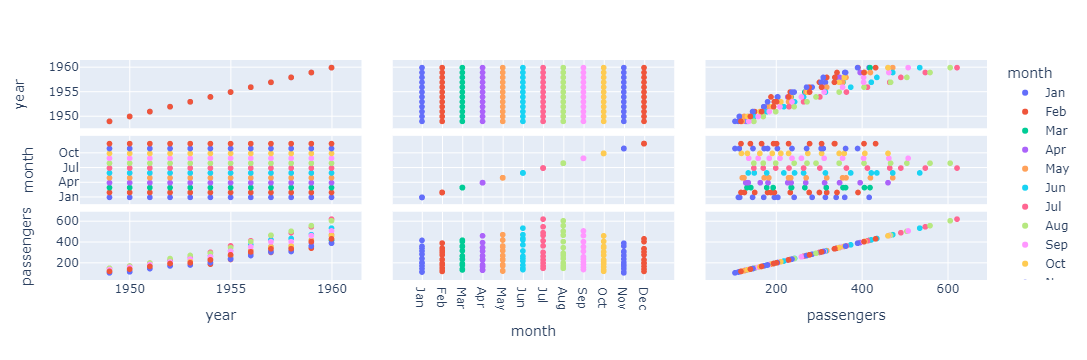

In [17]:
fig = px.scatter_matrix(flights, color='month')

fig

### Mapp Scatter Plots

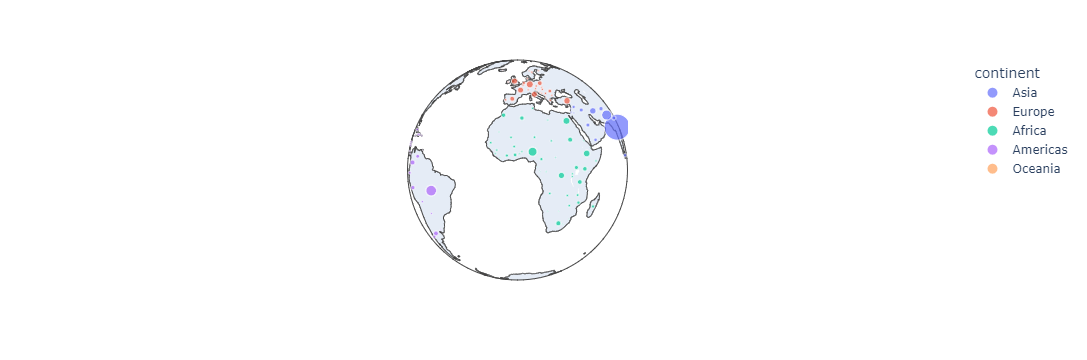

In [21]:
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations="iso_alpha",
                   color="continent",
                   hover_name="country",
                   size="pop",
                   projection="orthographic")
fig

### Animated Plots

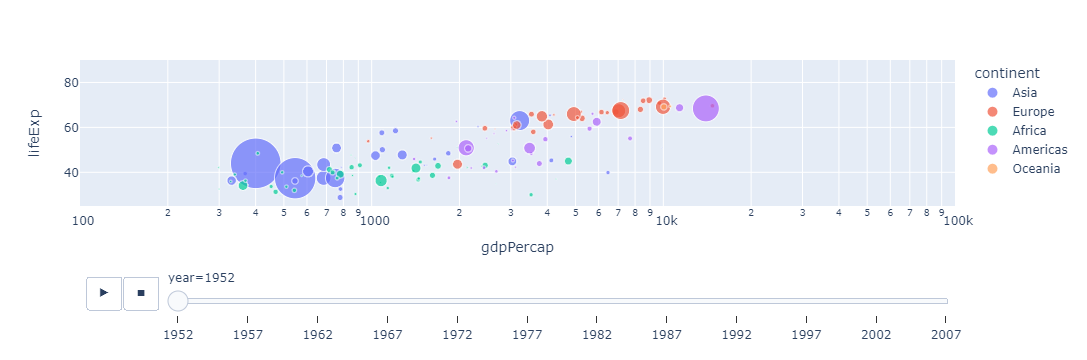

In [25]:
df_cnt = px.data.gapminder()
px.scatter(df_cnt, x='gdpPercap', y="lifeExp",
         animation_frame="year",
         animation_group="country",
         size="pop", color='continent', hover_name='country',
         log_x=True, size_max=55, range_x=[100, 100000],
         range_y=[25, 90] )

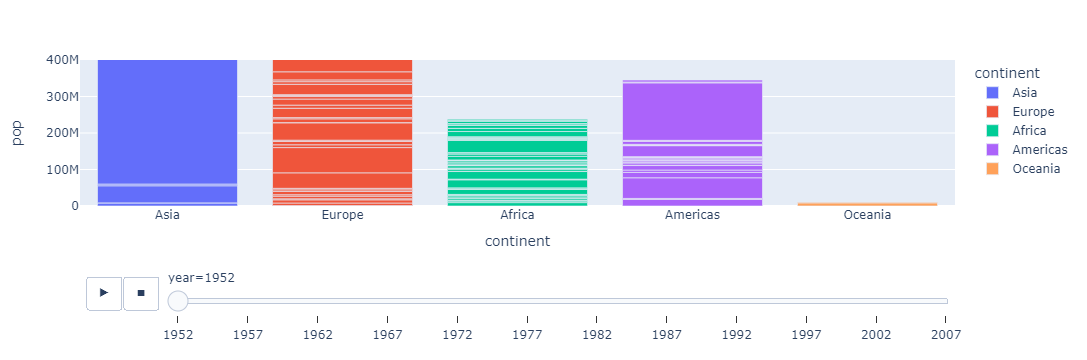

In [26]:
px.bar(df_cnt, x='continent', y="pop",
         animation_frame="year",
         animation_group="country",
         color='continent',
         range_y=[0, 400000000] )